In [1]:
import os
from glob import glob
import numpy as np
import h5py
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator
from scikit_posthocs import posthoc_nemenyi_friedman
plt.style.use('figure.mplstyle')

from function.data2p import get_data_bis
import function.utils as ut

## Load all datasets (3 days)

In [2]:
folder = r'D:\LW_Alldata\SI_Transient'
# folder = r'D:\LW_Alldata\SI_Spike'
alldata = {'Enriched': glob(os.path.join(folder,'Enriched*.hdf5')),
           'Dissimilar': glob(os.path.join(folder,'Distinct*.hdf5')),
           'Similar': [os.path.join(folder,'Similar5_937_invivo.hdf5'),
                       os.path.join(folder,'Similar6_939_invivo.hdf5'),
                       os.path.join(folder,'Similar7_948_invivo.hdf5'),
                       os.path.join(folder,'Similar8_5454_invivo.hdf5')]}

day = [1,2,3]  # Recording days, None for all days
min_rate = 1/60  # Minimum transient rate for active cells

In [4]:
auc_list = []
si_list = []
for p, exp in enumerate(['Enriched','Dissimilar','Similar']):
    print('Get %s datasets ...' % exp)
    auc, si = [], []
    for m, datapath in enumerate(alldata[exp]):
        data, cells, days, ctx, _ = get_data_bis(datapath, day=day, min_rate=min_rate)
        auc.append(cells['trate'].T)  # (2*nday, ncell)
        si.append(cells['si_unbiased'].T)  # (2*nday, ncell)
    auc_list.append(np.hstack(auc))
    si_list.append(np.hstack(si))

Get Enriched datasets ...
Get Dissimilar datasets ...
Get Similar datasets ...


In [5]:
def plot_summary_box(data, name='Activity', fig=None, ax=None, palette=['C0','C1'], nday=3):
    '''data : numpy.ndarray (2*nday, ncell) Fam/Nov cells property per day, pooled all mices
    '''
    day_list = [data[range(2*d,2*d+2)] for d in range(nday)]
    ut.compare_grouped(day_list, varnames=['Day','Context',name], 
                       varvalues=[np.arange(nday)+1,['Fam','Nov'],None], fig=fig, ax=ax,
                       kind='box', whis=(1,99), showfliers=False, test='Wilcoxon', palette=palette)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2_Fam vs. 2_Nov: Wilcoxon test (paired samples), P_val:1.219e-01 Stat=1.916e+04
1_Fam vs. 1_Nov: Wilcoxon test (paired samples), P_val:9.757e-03 Stat=1.766e+04
3_Fam vs. 3_Nov: Wilcoxon test (paired samples), P_val:1.440e-01 Stat=1.848e+04
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

2_Fam vs. 2_Nov: Wilcoxon test (paired samples), P_val:2.410e-10 Stat=1.224e+04
1_Fam vs. 1_Nov: Wilcoxon test (paired samples), P_val:4.056e-05 Stat=1.546e+04
3_Fam vs. 3_Nov: Wilcoxon test (paired samples), P_val:1.175e-01 Stat=1.833e+04
--------------------Activity--------------------
FriedmanchisquareResult(statistic=51.728413211800195, pvalue=6.132895883889994e-10)
          0         1         2         3         4         5
0  1.000000  0.029462  0.900000  

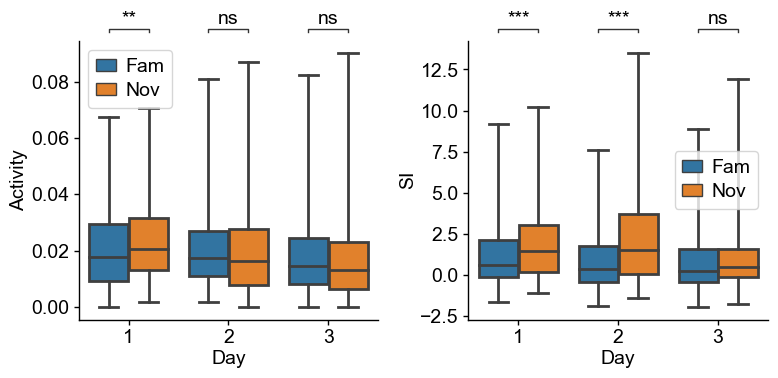

In [11]:
## Enriched
fig, axs = plt.subplots(1,2,figsize=(8,4))
plot_summary_box(auc_list[0], name='Activity', fig=fig, ax=axs[0], nday=len(day))
plot_summary_box(si_list[0], name='SI', fig=fig, ax=axs[1], nday=len(day))

print('-'*20+'Activity'+'-'*20)
print(stats.friedmanchisquare(*auc_list[0]))
print(posthoc_nemenyi_friedman(auc_list[0].T))
print('-'*20+'SI'+'-'*20)
print(stats.friedmanchisquare(*si_list[0]))
print(posthoc_nemenyi_friedman(si_list[0].T))